### 2.2 데이터 프레임(DataFrame)

In [149]:
import numpy as np
import pandas as pd

- 생성 방법1
    - 2차원 데이터, 컬럼, 인덱스

In [71]:
df1 = pd.DataFrame(
    np.random.randint(40, 101, 12).reshape(4, 3),       # 2차원 데이터
    columns=list('XYZ'),            # 컬럼명, list('XYZ') ==> ['X','Y','Z']
    index=list('abcd')              # 인덱스
)
df1

,X,Y,Z
a,53,87,68
b,79,47,51
c,100,49,71
d,54,50,82


- 생성방법 2
    - 딕셔너리의 리스트

In [72]:
data = [
    {'X':67, 'Y':50, 'Z':45},
    {'X':72, 'Y':88, 'Z':79},
    {'X':71, 'Y':78, 'Z':57},
    {'X':82, 'Y':75, 'Z':98}
]
df2 = pd.DataFrame(data, index=list('avcd'))
df2

,X,Y,Z
a,67,50,45
v,72,88,79
c,71,78,57
d,82,75,98


- 생성방법 3
    - 데이터가 value, 컬럼명이 key가 되는 딕셔너리

In [73]:
data = {
    'X': [67, 72, 71, 82],
    'Y': [50, 88, 78, 75],
    'Z': [45, 79, 57, 98]
}
df3 = pd.DataFrame(data, index=list('abcd'))
df3

,X,Y,Z
a,67,50,45
b,72,88,79
c,71,78,57
d,82,75,98


- 여러가지 타입이 혼합된 형태의 데이터로 생성

In [74]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [75]:
df.index.name = '도시'
df.columns.name = '항목'
df

항목,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [76]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [77]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object', name='항목')

In [78]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object', name='도시')

- 연습문제 4.1.2

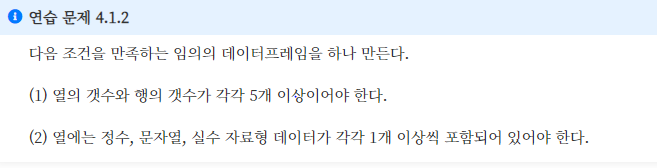

In [79]:
data = []
for i in range(5):
    d = {
        '문자열': chr(np.random.randint(65, 91)) + chr(np.random.randint(65, 91)),
        '정수1': np.random.randint(1, 7),
        '정수2': np.random.randint(40, 101),
        '정수3': np.random.randint(1, 100) * 1000,
        '실수':round(np.random.random(), 4)
    }
    data.append(d)
df4 = pd.DataFrame(data, index=list('vwxyz'))
df4

,문자열,정수1,정수2,정수3,실수
v,DV,1,93,46000,0.8341
w,RE,2,87,2000,0.0695
x,FG,4,62,73000,0.8340
y,CI,4,82,5000,0.2035
z,ET,6,40,27000,0.1340


In [80]:
data5 = {
    'A': [1, 2, 3, 4, 5],
    'B': ['아','야','어','여','우'],
    'C': [0.1, 0.2, 0.3, 0.4, 0.5],
    'D': [123, 456, 789, 1098, 765],
    'E': ['하','햐','허','혀','후']
}
df8 = pd.DataFrame(data5, index=list('mnbjf'))      #
df8

,A,B,C,D,E
m,1,아,0.1,123,하
n,2,야,0.2,456,햐
b,3,어,0.3,789,허
j,4,여,0.4,1098,혀
f,5,우,0.5,765,후


- 전치(Transpose)

In [81]:
df4.T

,v,w,x,y,z
문자열,DV,RE,FG,CI,ET
정수1,1,2,4,4,6
정수2,93,87,62,82,40
정수3,46000,2000,73000,5000,27000
실수,0.8341,0.0695,0.834,0.2035,0.134


- 열 데이터의 갱신, 추가

In [82]:
df

항목,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [83]:
df['2010-2015 증가율'] = df['2010-2015 증가율'] * 100
df

항목,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [84]:
# 열 이름이 있으면 갱신, 없으면 추가
df['Eng name'] = ['Seoul', 'Busan', 'Incheon', 'Daegu']
df

항목,지역,2015,2010,2005,2000,2010-2015 증가율,Eng name
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,Seoul
부산,경상권,3448737,3393191,3512547,3655437,1.63,Busan
인천,수도권,2890451,2632035,2517680,2466338,9.82,Incheon
대구,경상권,2466052,2431774,2456016,2473990,1.41,Daegu


- 열 삭제

In [85]:
del df['2000']

In [86]:
df.drop(columns=['2005','2010'], inplace=True)
df

항목,지역,2015,2010-2015 증가율,Eng name
도시,,,,
서울,수도권,9904312,2.83,Seoul
부산,경상권,3448737,1.63,Busan
인천,수도권,2890451,9.82,Incheon
대구,경상권,2466052,1.41,Daegu


In [87]:
# 행을 지울 때
df.drop(['대구'], inplace=True)
df

항목,지역,2015,2010-2015 증가율,Eng name
도시,,,,
서울,수도권,9904312,2.83,Seoul
부산,경상권,3448737,1.63,Busan
인천,수도권,2890451,9.82,Incheon


In [88]:
# 열 이름을 하나만 선택하면 시리즈 반환
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
Name: 지역, dtype: object

In [89]:
# 열 이름이 리스트로 감싸져 있으면 데이터프레임 반환
df[['지역']]

항목,지역
도시,
서울,수도권
부산,경상권
인천,수도권


- 개별 인덱싱

In [90]:
# 데이터프레임[열 이름][행 인덱스]
df['지역']['서울'],df['지역'].서울, df.지역['서울'], df.지역.서울

('수도권', '수도권', '수도권', '수도권')

In [91]:
# 컬럼명이 숫자로 시작하거나 공백이 있는 경우에는. 컬럼명을 사용할 수 없음
df.2015['서울']

SyntaxError: invalid syntax (3060927605.py, line 2)

- 연습문제 4.1.3

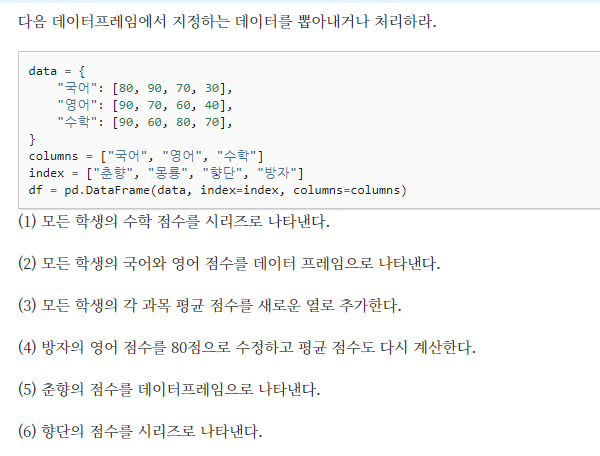

In [158]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [ ]:
#(1) 모든 학생의 수학 점수를 시리즈로 나타낸다.
m = pd.Series([90, 60, 80, 70],
                index=['춘향','몽룡','향단','방자'])
m

춘향    90
몽룡    60
향단    80
방자    70
dtype: int64

In [101]:
#(1) 모든 학생의 수학 점수를 시리즈로 나타낸다.
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [103]:
#(2) 모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.

df[['국어','영어']]


,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


In [166]:
#(3) 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.
df.mean(axis='columns')
df['평균점수'] = round(df.mean(axis='columns'))
df



,국어,영어,수학,평균점수
춘향,80,90,90,87.0
몽룡,90,70,60,73.0
향단,70,60,80,70.0
방자,30,40,70,47.0


In [105]:
#(4) 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.

df['영어'] =[90, 70, 60, 80]
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,80,70


In [127]:
df.index.name = '이름'
df.columns.name = '과목'
df

과목,국어,영어,수학
이름,,,
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [140]:
#(5) 춘향의 점수를 데이터프레임으로 나타낸다.
df['국어']['춘향'],df['수학']['춘향'],df['영어']['춘향']

(80, 90, 90)

In [146]:
#(6) 향단의 점수를 시리즈로 나타낸다.
df[['국어']],df[['수학']],df[['영어']]

(과목  국어
 이름    
 춘향  80
 몽룡  90
 향단  70
 방자  30,
 과목  수학
 이름    
 춘향  90
 몽룡  60
 향단  80
 방자  70,
 과목  영어
 이름    
 춘향  90
 몽룡  70
 향단  60
 방자  40)